In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import matplotlib
matplotlib.rcParams["image.interpolation"] = None
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tqdm import tqdm
from tifffile import imread
from csbdeep.utils import Path, normalize

from stardist import fill_label_holes, random_label_cmap, calculate_extents, gputools_available
from stardist import Rays_GoldenSpiral
from stardist.matching import matching, matching_dataset
from stardist.models import Config3D, StarDist3D, StarDistData3D

np.random.seed(42)
lbl_cmap = random_label_cmap()

In [2]:
mask_files = glob('../../data/dl-course-2022/masks/*.tif*')
img_files = glob('../../data/dl-course-2022/images/*.tif*')

In [9]:
test_img = imread(mask_files[0])

In [3]:
import h5py
import os

In [7]:
for i in range(0,len(mask_files)):
    # print(i)
    # check image and mask file name is the same
    assert(os.path.basename(mask_files[i]) == os.path.basename(img_files[i]))
    # read mask and image
    mask_img = imread(mask_files[i])
    img = imread(img_files[i])
    # fill any holes in mask images
    mask_img_fill_holes = fill_label_holes(mask_img)
    # convert to DWH format
    new_mask_img = np.zeros((21,1024,1024))
    for z, slice_data in enumerate(mask_img_fill_holes):
        new_mask_img[z,:,:] = slice_data
    # convert images to DWH format
    new_img = np.zeros((21,1024,1024))
    for z, im_slice_data in enumerate(img):
        new_img[z,:,:] = im_slice_data
    
    with h5py.File(os.path.join('../../data/dl-course-2022/h5/',
                                os.path.basename(mask_files[i]).replace('.tif',''))+'.h5', 'w') as f:
        f['raw'] = new_img
        f['label'] = new_mask_img

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


In [13]:
img_files = glob('../../data/dl-course-2022/images/*.tif*')

In [14]:
img_files

['../../data/dl-course-2022/images/esc_siRDNA_21.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_5.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_30.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_6.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_33.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_29.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_24.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_50.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_46.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_39.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_53.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_41.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_27.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_52.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_43.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_45.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_18.tif',
 '../../data/dl-course-2022/images/esc_siRDNA_49.tif',
 '../../data

In [16]:
for img_file in img_files:
    img = imread(img_file)
    new_img = np.zeros((21,1024,1024))
    for z, slice_data in enumerate(img):
        new_img[z,:,:] = slice_data
    with h5py.File(os.path.join('../../data/dl-course-2022/h5/images',
                                os.path.basename(img_file).replace('.tif',''))+'.hdf5', 'w') as f:
        f['dataset'] = new_img

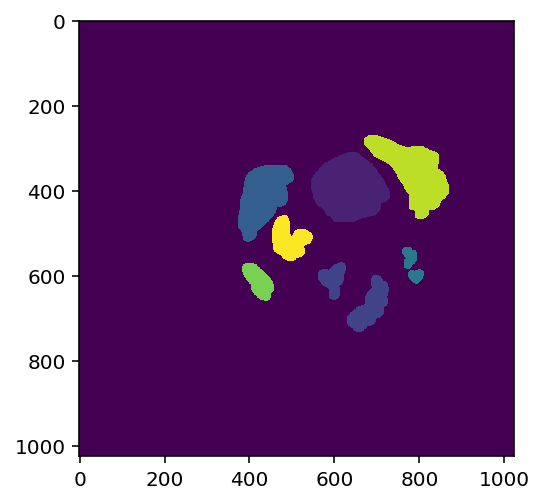

In [11]:
plt.imshow(new_img[12,:,:])

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [20]:
import h5py